### Eigenvalues of an Hermitian Matrix

Author: Andrés Gómez - 2020



In [1]:
import numpy as np
import math
from qiskit import BasicAer, QuantumCircuit, QuantumRegister,ClassicalRegister,transpile
from qiskit.aqua import QuantumInstance
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua.components.iqfts import Standard
from qiskit.aqua.operators import MatrixOperator, op_converter


Auxiliary functions to to show the matrix and quantum states

In [2]:
def MatrixToLatex(A):
    a="\\begin{pmatrix}"
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if ((j+1)%A.shape[1])==0:
                a=a+"{0:.2f}".format(A[i,j])
            else:
                a=a+"%s&"%"{0:.2f}".format(A[i,j])
        if ((i+1)%A.shape[0])!=0:
            a=a+"\\\\"
    a=a+"\\end{pmatrix}"
    return(a)
def Display(string):
    from IPython.display import display, Markdown
    display(Markdown(string))
    


Create one matrix $M$ from an spectral decomposition. Let be the eigenvectors

$$v_1=\frac{1 }{\sqrt{2}}(|00\rangle+|01\rangle)\\ v_2=\frac{1 }{\sqrt{2}}(|00\rangle-|01\rangle) \\v_3=\frac{1 }{\sqrt{2}}(|10\rangle+|11\rangle) \\ v_4=\frac{1 }{\sqrt{2}}(|10\rangle-|11\rangle)$$

and the eigenvalues $\lambda_1=16,\lambda_2=8,\lambda_3=4,\lambda_4=2$ 

Define the matrix
$$M=\lambda_1|v_1\rangle\langle v_1| +  \lambda_2|v_2\rangle\langle v_2| + \lambda_3|v_3\rangle\langle v_3| + \lambda_4|v_4 \rangle\langle v_4|$$


In [3]:
Lambda=[16,8,4,2]
Chi1P=(1/math.sqrt(2))*np.array([[1],[1],[0],[0]])
Chi1M=(1/math.sqrt(2))*np.array([[1],[-1],[0],[0]])
Chi2P=(1/math.sqrt(2))*np.array([[0],[0],[1],[1]])
Chi2M=(1/math.sqrt(2))*np.array([[0],[0],[1],[-1]])
Vector=[Chi1P,Chi1M,Chi2P,Chi2M] # Two, Three]
M=np.zeros((len(Chi1P),len(Chi1P)))
for i in range(len(Vector)):
    M=M+Lambda[i]*np.dot(Vector[i],Vector[i].T)
Display("M=%s"%MatrixToLatex(M))
    


M=\begin{pmatrix}12.00&4.00&0.00&0.00\\4.00&12.00&0.00&0.00\\0.00&0.00&3.00&1.00\\0.00&0.00&1.00&3.00\end{pmatrix}

Check that this matrix has the expected eigenvalues and eigenvector

In [4]:
E,v=np.linalg.eig(M)
Display("Eigenvalues: %s"%np.array2string(E,separator=", "))
Display("Eigenvectors: %s"%np.array2string(v,separator=", "))
for i in range(len(Vector)):
    Display("M|v_%d> = %s must be Lambda[%d]*|v[%d]>=%s"%(i,np.array2string(np.dot(M,Vector[i]).T), i,i,np.array2string(Lambda[i]*Vector[i].T,separator=", ")))


Eigenvalues: [16.,  8.,  4.,  2.]

Eigenvectors: [[ 0.70710678, -0.70710678,  0.        ,  0.        ],
 [ 0.70710678,  0.70710678,  0.        ,  0.        ],
 [ 0.        ,  0.        ,  0.70710678, -0.70710678],
 [ 0.        ,  0.        ,  0.70710678,  0.70710678]]

M|v_0> = [[11.3137085 11.3137085  0.         0.       ]] must be Lambda[0]*|v[0]>=[[11.3137085, 11.3137085,  0.       ,  0.       ]]

M|v_1> = [[ 5.65685425 -5.65685425  0.          0.        ]] must be Lambda[1]*|v[1]>=[[ 5.65685425, -5.65685425,  0.        ,  0.        ]]

M|v_2> = [[0.         0.         2.82842712 2.82842712]] must be Lambda[2]*|v[2]>=[[0.        , 0.        , 2.82842712, 2.82842712]]

M|v_3> = [[ 0.          0.          1.41421356 -1.41421356]] must be Lambda[3]*|v[3]>=[[ 0.        ,  0.        ,  1.41421356, -1.41421356]]

## Unitary operator from the Hermitian Matrix

From the Hermitian matrix $M \in C^{2^nx2^n}$, it is possible to create an Unitary Operator $U_M=e^{iM}$ with eigenvalues $e^{i\lambda_i}$, being $\lambda_i$ the eigenvalues of $M$ and with the same eigenvectors

Check that $U_M |v_i>=e^{iM}|v_i>=e^{i\lambda_i} |v_i>$

In [5]:
from scipy.linalg import expm
for i in range(len(Vector)):
    OP=np.dot(expm(1j*M),Vector[i])
    EIG=np.exp(1j*Lambda[i])*Vector[i]          
    Display("$$ U_M |v[%d]\rangle=%s,e^{i\lambda_%d}|v[%d]\rangle=%s$$"%(i,MatrixToLatex(OP),i,i,MatrixToLatex(EIG)))


$$ U_M |v[0]angle=\begin{pmatrix}-0.68-0.20j\\-0.68-0.20j\\0.00+0.00j\\0.00+0.00j\end{pmatrix},e^{i\lambda_0}|v[0]angle=\begin{pmatrix}-0.68-0.20j\\-0.68-0.20j\\0.00-0.00j\\0.00-0.00j\end{pmatrix}$$

$$ U_M |v[1]angle=\begin{pmatrix}-0.10+0.70j\\0.10-0.70j\\0.00+0.00j\\0.00+0.00j\end{pmatrix},e^{i\lambda_1}|v[1]angle=\begin{pmatrix}-0.10+0.70j\\0.10-0.70j\\-0.00+0.00j\\-0.00+0.00j\end{pmatrix}$$

$$ U_M |v[2]angle=\begin{pmatrix}0.00+0.00j\\0.00+0.00j\\-0.46-0.54j\\-0.46-0.54j\end{pmatrix},e^{i\lambda_2}|v[2]angle=\begin{pmatrix}0.00-0.00j\\0.00-0.00j\\-0.46-0.54j\\-0.46-0.54j\end{pmatrix}$$

$$ U_M |v[3]angle=\begin{pmatrix}0.00+0.00j\\0.00+0.00j\\-0.29+0.64j\\0.29-0.64j\end{pmatrix},e^{i\lambda_3}|v[3]angle=\begin{pmatrix}-0.00+0.00j\\-0.00+0.00j\\-0.29+0.64j\\0.29-0.64j\end{pmatrix}$$

Because the eigenvalues of this case are integers, they have an exact binary representation

In [6]:
for i in range(len(Lambda)):
    print("Binary of %2.2f is "%(Lambda[i]),"{0:05b}".format(int(Lambda[i])))

Binary of 16.00 is  10000
Binary of 8.00 is  01000
Binary of 4.00 is  00100
Binary of 2.00 is  00010


# Matrix decomposition
Any matrix $M \in \mathbb{C}^{2^nx2^n}$, being $n$ the number of qubits, can be decomposed on tensor products of the extended Pauli set $\Sigma=\{I,X,Y,Z\}$. 

If  $\sigma_i \in \Sigma, i=1,2,3,4$,  then 

$$M=\sum_{ijk\dots l=1}^4 A_{ijk\dots l} \sigma_i\otimes\sigma_j\otimes\sigma_k\otimes \dots \otimes\sigma_l$$

where
$$A_{ijk\dots l}=\frac{1}{2^n}Tr[\sigma_i\otimes\sigma_j\otimes\sigma_k\otimes \dots \otimes\sigma_l M]$$

If the matrix M is Hermitian, $A_{ijk\dots l} \in \mathbb{R}$ 


The decomposition of $M$ is

$$M=a_{11}(I\otimes I)+ a_{12}(I\otimes X) +a_{13}(I\otimes Y)+ a_{14}(I\otimes Z)\\+a_{21}(X\otimes I)+a_{22}(X\otimes X)+a_{23}(X\otimes Y)+a_{24}(X\otimes Z)\\+a_{31}(Y\otimes I)+a_{32}(Y\otimes X)+a_{33}(Y\otimes Y)+a_{34}(Y\otimes Z)\\+a_{41}(Z\otimes I)+a_{42}(Z\otimes X)+a_{43}(Z\otimes Y)+a_{44}(Z\otimes Z)$$ 


$$M= 7.5(I\otimes I) + 2.5(I\otimes X) + 4.5(Z\otimes I) +1.5(Z\otimes X)$$ 

For example:

$$a_{11}=\frac{1}{2^2}Tr((I\otimes I)M)=\frac{1}{4}Tr\left[ \begin{pmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&1\end{pmatrix}\begin{pmatrix}12&4&0&0\\4&12&0&0\\0&0&3&1\\0&0&1&3\end{pmatrix}\right]=\\
=\frac{1}{4}Tr\left[\begin{pmatrix}12&0&0&0\\0&12&0&0\\0&0&3&0\\0&0&0&3\end{pmatrix} \right]=\frac{1}{4}30=7.5$$

Creating an Operator using the class **MarixOperator**, it is possible to get the decomposition on Pauli's using the util **op_converter.to_weighted_pauli_operator**

In [7]:
Mqiskit = MatrixOperator(matrix=M)
Mqiskit = op_converter.to_weighted_pauli_operator(Mqiskit)
P=""
for m in Mqiskit.to_dict()['paulis']:
    if P!="":
        P+="+"
    P+="(%.2f+%.2fj)%s"%(m['coeff']["real"],m['coeff']["imag"],m['label'])
print(P)

(7.50+0.00j)II+(2.50+0.00j)IX+(4.50+0.00j)ZI+(1.50+0.00j)ZX


Now, construct the circuit for the phase estimation circuits. We will build in this case the unitary operator using the **[evolution_instruction](https://qiskit.org/documentation/api/qiskit.aqua.operators.evolution_instruction.html)** function of Qiskit. This instruction makes the time evolution of a Hamiltonian (in our case, the decomposition on $\sigma_i$ of M) as $$U_M=e^{-iMt}$$ 
We will choose $$t=\frac{-2\pi}{2^{accuracy}}$$, being *accuracy* the number of desired binary digits for our eigenvalues. 

This will map the eigenvalues of the Matrix M on the states of the qubit register. Because the $-$ sign is implicit in TimeEvolution operator and the positive exponent is desired to calculate the eigenvalues ( $e^{iMt}$ ), a $-$ sign must be included on the selected time. 

This function accepts as argument a number of a vector. From 0 to 3, this number will initialize the vector $b$ with the eigenvectors of M. From 4 and 6, b is initialized to:

$4, |b_4\rangle=|01\rangle=\frac{\sqrt{2}}{2}(|v_1\rangle - |v_2\rangle)=\beta_1|v_1\rangle + \beta_2 |v_2\rangle$

$5, |b_5\rangle=|10\rangle=\frac{\sqrt{2}}{2}(|v_3\rangle + |v_4\rangle)$

$6, |b_6\rangle=H_1 R_{x0}(0.05)R_{x1}(0.25)|00\rangle$

The controled operation $CU_M$ with a single additional qubit is defined as:

$$CU_M=|0\rangle\langle0|\otimes I +|1\rangle\langle1|\otimes U_M$$

so,

$$CU_M(H|0\rangle\otimes|b_4\rangle)=CU_M[(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\otimes|b_4\rangle)]=$$
$$=\frac{1}{\sqrt{2}}[|0\rangle\otimes|b_4\rangle + |1\rangle\otimes U_M(|b_4\rangle)]=$$
$$=\frac{1}{\sqrt{2}}[|0\rangle\otimes (\beta_1 |v_1\rangle + \beta_2 |v_2\rangle) + |1\rangle\otimes U_M(\beta_1 |v_1\rangle + \beta_2 |v_2\rangle)]$$
$$= \frac{1}{\sqrt{2}}[|0\rangle \otimes(\beta_1 |v_1\rangle + \beta_2 |v_2\rangle)+ |1\rangle\otimes(\beta_1 e^{i\lambda_1t}|v_1\rangle + \beta_2 e^{i\lambda_2t}|v_2\rangle)]$$

$$=\frac{\beta_1}{\sqrt{2}}[|0\rangle \otimes |v_1\rangle + e^{i\lambda_1t}|1\rangle \otimes |v_1\rangle)]
+ \frac{\beta_2}{\sqrt{2}}[|0\rangle \otimes |v_2\rangle + e^{i\lambda_2t}|1\rangle \otimes |v_2\rangle)]$$
$$=\frac{1}{\sqrt{2}}[(|0\rangle + e^{i\lambda_1t}|1\rangle) \otimes \beta_1|v_1\rangle)]
+ \frac{1}{\sqrt{2}}[(|0\rangle + e^{i\lambda_2t}|1\rangle) \otimes \beta_2|v_2\rangle)]$$

Passing the eigenvalues to the control qubit and keeping the superposition of $|v_1\rangle$ and $|v_2\rangle$ on register $|b\rangle$

Defining the controlled unitary operation of operator U with qubit l as $C^lU$, if we appy $\Pi_{l=0}^{accuracy}C^l(U_M)^l$ on state $H^{\otimes accuracy}|0\rangle \otimes |b_4\rangle$, the result is:

$$\Pi_{l=0}^{accuracy}C^l(U_M)^l[H^{\otimes accuracy}|0\rangle \otimes |b_4\rangle] = [ \frac{\beta_1}{2^{accuracy/2}}\sum_{k=0}^{2^{accuracy}-1} e^{i\lambda_1 tk}|k\rangle \otimes |v_1\rangle ]+ [\frac{\beta_2}{2^{accuracy/2}}\sum_{k=0}^{2^{accuracy}-1} e^{i\lambda_2 tk}|k\rangle \otimes |v_2\rangle]$$

Choosing $t=\frac{2\pi}{2^{accuracy}}$, the final state after the controlled operations is:

$$[ \frac{\beta_1}{2^{accuracy/2}}\sum_{k=0}^{2^{accuracy}-1} e^{i2\pi k \frac{\lambda_1}{2^{accuracy}}}|k\rangle \otimes |v_1\rangle ]+ [\frac{\beta_2}{2^{accuracy/2}}\sum_{k=0}^{2^{accuracy}-1} e^{i2\pi k \frac{\lambda_2}{2^{accuracy}}}|k\rangle \otimes |v_2\rangle]$$

Now, applying now the inverse Quantum Fourier Transform on the control qubits:

$$(iQFT\otimes I)([ \frac{\beta_1}{2^{accuracy/2}}\sum_{k=0}^{2^{accuracy}-1} e^{i2\pi k \frac{\lambda_1}{2^{accuracy}}}|k\rangle \otimes |v_1\rangle ]+ [\frac{\beta_2}{2^{accuracy/2}}\sum_{k=0}^{2^{accuracy}-1} e^{i2\pi k \frac{\lambda_2}{2^{accuracy}}}|k\rangle \otimes |v_2\rangle])=$$

$$=iQFT( \frac{\beta_1}{2^{accuracy/2}}\sum_{k=0}^{2^{accuracy}-1} e^{i2\pi k \frac{\lambda_1}{2^{accuracy}}}|k\rangle) \otimes I|v_1\rangle+
iQFT( \frac{\beta_2}{2^{accuracy/2}}\sum_{k=0}^{2^{accuracy}-1} e^{i2\pi k \frac{\lambda_2}{2^{accuracy}}}|k\rangle) \otimes I|v_2\rangle 
=$$
$$=\beta_1|\lambda_1\rangle\otimes|v_1\rangle + \beta_2|\lambda_2\rangle\otimes|v_2\rangle
$$

As consecuence, the state has a superposition of all the eigenvalues of $M$ on the control register.

In [8]:
def InitState(qc,b,vector=0,barrier=True):
    """
    Init the vector b
    """
    if vector==0:
        """
        1/sqrt(2)(|00>+|01>)
        """
        qc.h(b[0])
    if vector==1:
        """
        1/sqrt(2)(|00>-|01>)
        """
        qc.x(b[0])
        qc.h(b[0])
    if vector==2:
        """
        1/sqrt(2)(|10>+|11>)
        """

        qc.x(b[1])
        qc.h(b[0])
    if vector==3:
        """
        1/sqrt(2)(|10>-|11>)
        """
        qc.x(b[1])
        qc.x(b[0])
        qc.h(b[0])
    if vector==4:
        """
        |01>
        """
        qc.x(b[0])
    if vector==5:
        """
        |10>
        """
        qc.x(b[1])
        
    if vector==6:
        qc.rx(0.05,b[0])
        qc.rx(0.25,b[1])
        qc.h(b[1])
    if barrier==True:
        qc.barrier()
    return

In [20]:
def QPE(Mqiskit,qc,C,b,barrier=True):
    from qiskit.aqua.operators import evolution_instruction
    IPhase=Mqiskit.paulis[0][0] #The global phase that it is added by the Identitites
    accuracy=len(C)
    """
    Initialize the control register using a Walsh-Hadamard operation
    """
    qc.h(C)
    
    """
    Apply the time evolution of the Matrix
    """
    for i in range(accuracy):
        te=evolution_instruction(Mqiskit.paulis,evo_time=-2*np.pi/2**accuracy,power=2**i,num_time_slices=1,controlled=True)
        qc.append(te,[b[0],b[1],C[i]])
        # global phase shift for the ancilla due to the identity pauli term. Evolution instruction skips "II"
        qc.u1((2*np.pi/2**accuracy) * Mqiskit.paulis[0][0].real * (2 ** i), C[i])
        if barrier==True:
            qc.barrier()
    
    """
    Now Aplly the inverse of the QPE
    """
    iqft = Standard(accuracy)
    iqft.construct_circuit(mode="circuit",circuit=qc,qubits=C,do_swaps=True)
    if barrier==True:
        qc.barrier()
    
    return

We will calculate the fase with an accuracy of $$\frac{1}{2^5}$$

Because this is a probabilistic algorithm, we have to repeat the experiment several times. In this case, 100

Calculate the eigenvalues for the eigenvestors

[{'10000': 1000}, {'01000': 1000}, {'00100': 1000}, {'00010': 1000}]


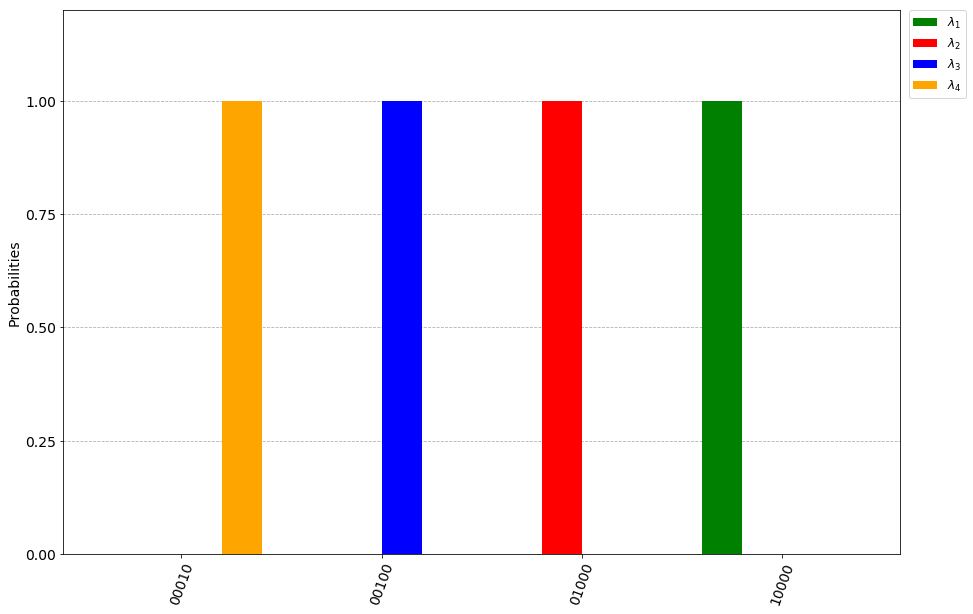

In [21]:
accuracy=5
Results=[]
for i in range(4):
    C=QuantumRegister(accuracy,name="clock")
    b=QuantumRegister(Mqiskit.num_qubits,name="b")
    sol=ClassicalRegister(accuracy,name="c")
    qc=QuantumCircuit(C,b,sol,name="QPE")

    InitState(qc,b,vector=i)
    

    QPE(Mqiskit,qc,C,b)

    qc.measure(C,sol)
    
    backend = BasicAer.get_backend("qasm_simulator")
    quantum_instance = QuantumInstance(backend, shots=1000)
    results=quantum_instance.execute(qc)
    Results.append(results.get_counts(qc))
print(Results)
Labels=["$\lambda_1$","$\lambda_2$","$\lambda_3$","$\lambda_4$"]
plot_histogram(Results,legend=Labels,color=["green","red","blue","orange"],bar_labels=False,figsize=(15,10))
#qc.draw(output="mpl")

For the vector=4, 

$|b_4\rangle=|01\rangle=\frac{\sqrt{2}}{2}(|v_1\rangle-|v_2\rangle)$

so, because this superposition, the final state after the QPE must contain eigenvalues $\lambda_1$ and $\lambda_2$

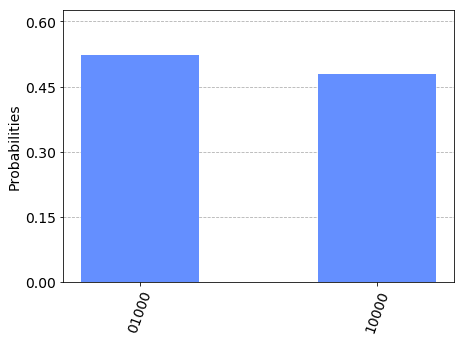

In [22]:
C=QuantumRegister(accuracy,name="clock")
b=QuantumRegister(Mqiskit.num_qubits,name="b")
sol=ClassicalRegister(accuracy,name="c")
qc=QuantumCircuit(C,b,sol,name="QPE")

InitState(qc,b,vector=4)

qc.barrier()

QPE(Mqiskit,qc,C,b)

qc.measure(C,sol)

backend = BasicAer.get_backend("qasm_simulator")
quantum_instance = QuantumInstance(backend, shots=1000)
results=quantum_instance.execute(qc)

plot_histogram(results.get_counts(qc),bar_labels=False)


For the vector=5, 

$|b_5\rangle=|10\rangle=\frac{\sqrt{2}}{2}(|v_3\rangle-|v_4\rangle)$

so, because this superposition, the final state after the QPE must contain eigenvalues $\lambda_3$ and $\lambda_4$

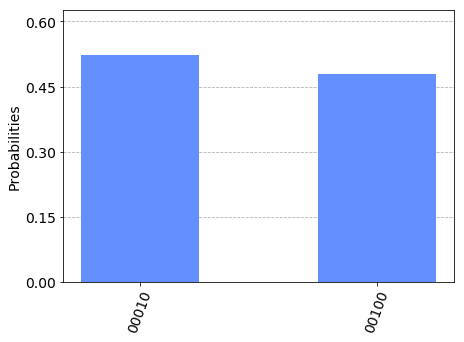

In [23]:
C=QuantumRegister(accuracy,name="clock")
b=QuantumRegister(Mqiskit.num_qubits,name="b")
sol=ClassicalRegister(accuracy,name="c")
qc=QuantumCircuit(C,b,sol,name="QPE")

InitState(qc,b,vector=5)

qc.barrier()

QPE(Mqiskit,qc,C,b)

qc.measure(C,sol)

backend = BasicAer.get_backend("qasm_simulator")
quantum_instance = QuantumInstance(backend, shots=1000)
results=quantum_instance.execute(qc)

plot_histogram(results.get_counts(qc),bar_labels=False)


And, because 
$$|b_6\rangle=H_1 R_{x0}(0.05)R_{x1}(0.25)|00\rangle = \sum_{i=1}^4\beta_i |v_i\rangle$$

the final state must have a combination of every eigenvalue

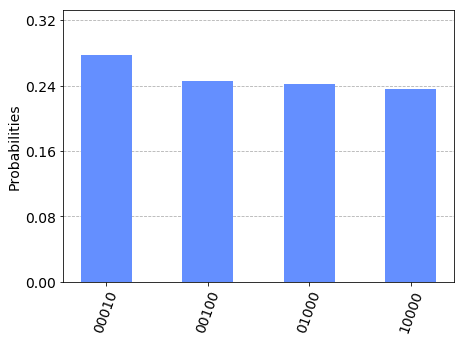

In [24]:
C=QuantumRegister(accuracy,name="clock")
b=QuantumRegister(Mqiskit.num_qubits,name="b")
sol=ClassicalRegister(accuracy,name="c")
qc=QuantumCircuit(C,b,sol,name="QPE")

InitState(qc,b,vector=6)

qc.barrier()

QPE(Mqiskit,qc,C,b)

qc.measure(C,sol)

backend = BasicAer.get_backend("qasm_simulator")
quantum_instance = QuantumInstance(backend, shots=1000)
results=quantum_instance.execute(qc)

plot_histogram(results.get_counts(qc),bar_labels=False)


Draw the circuit for $|b_6\rangle$

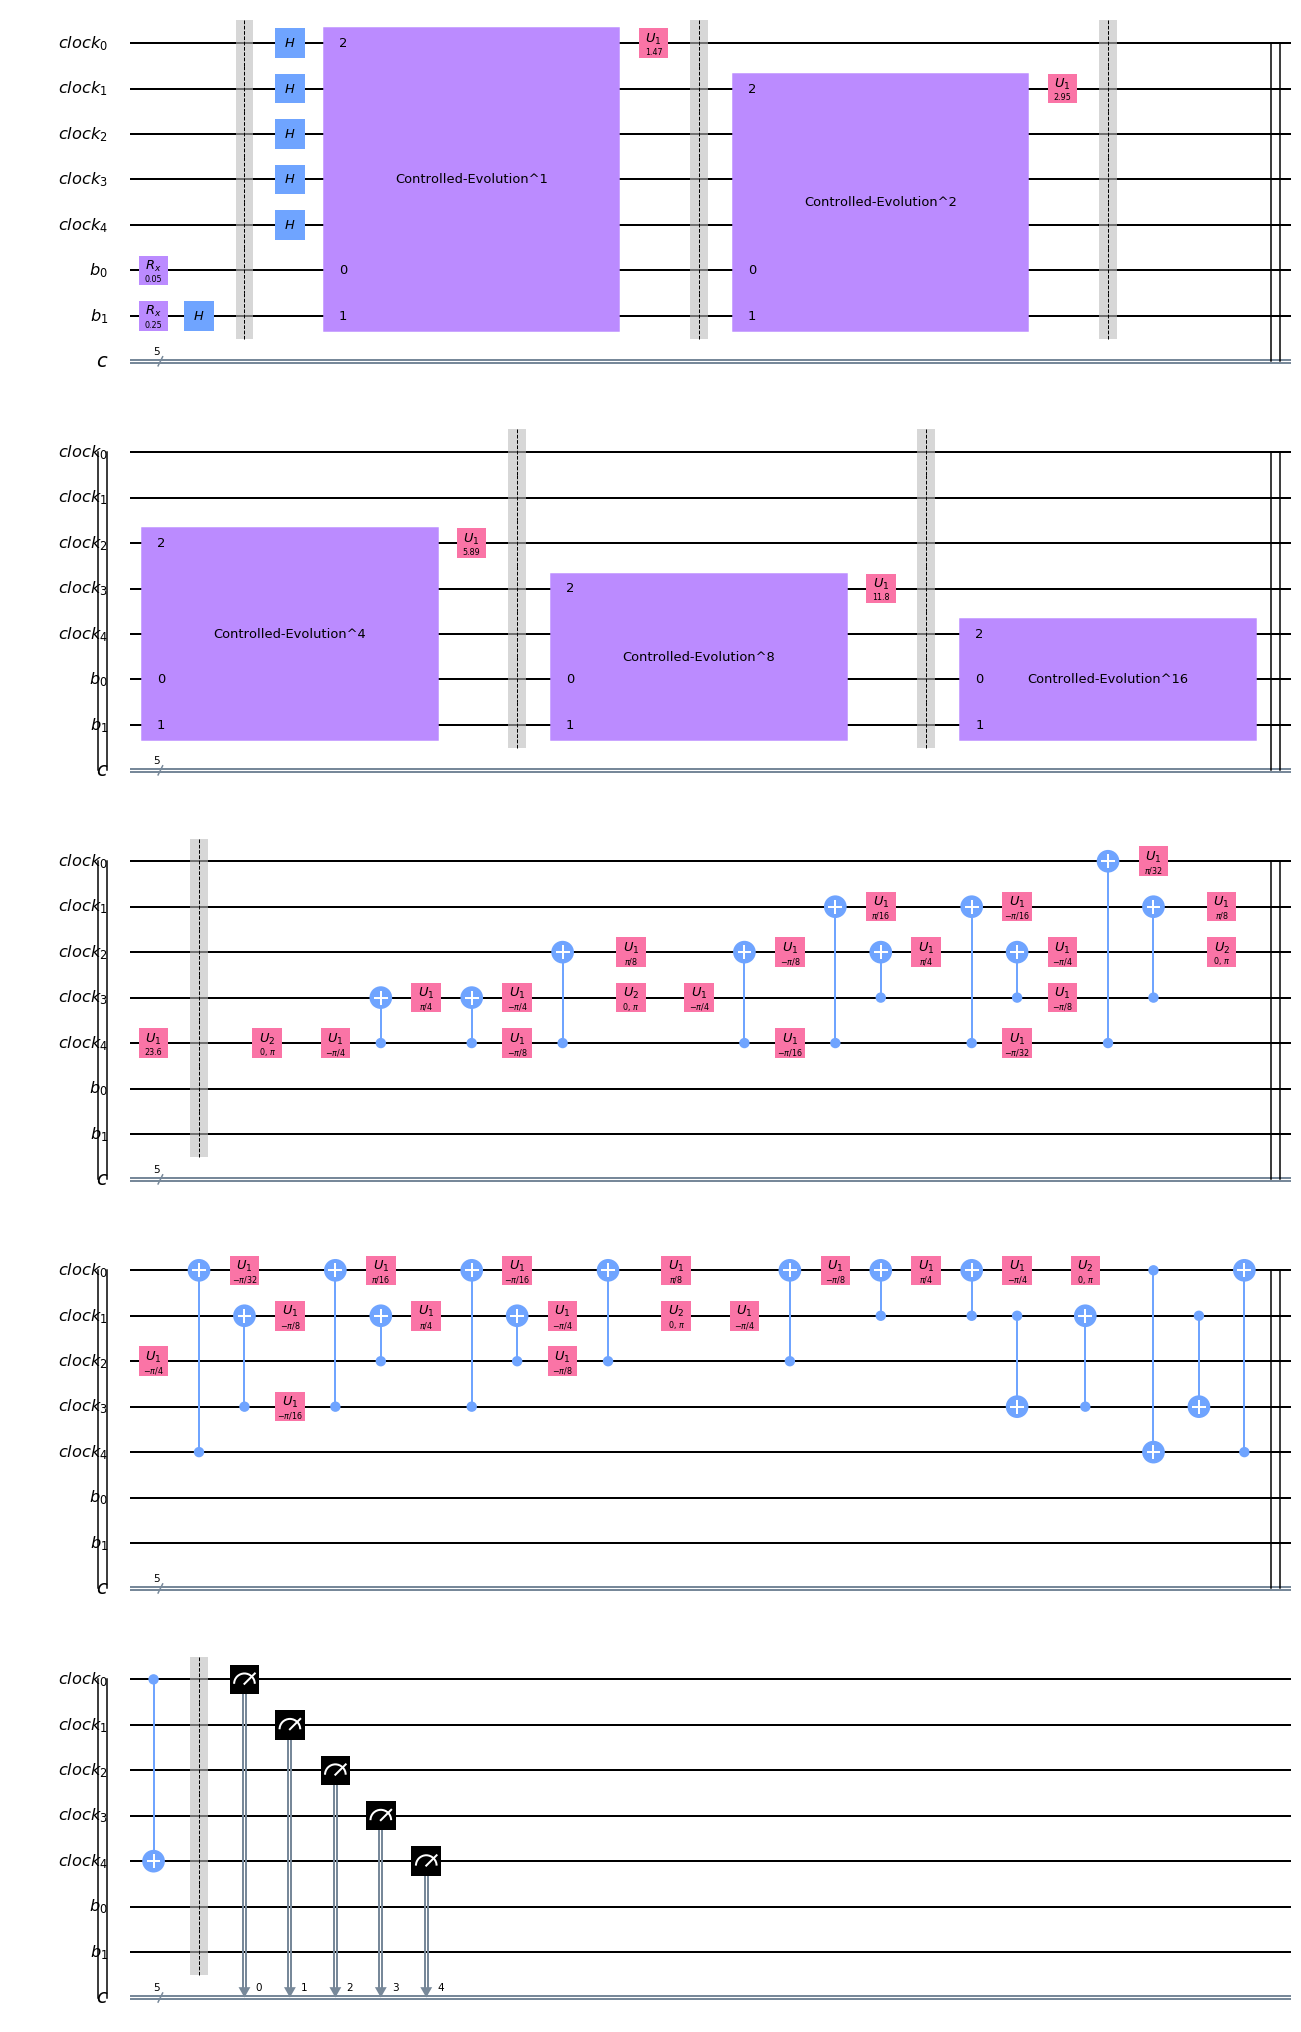

In [25]:
C=QuantumRegister(accuracy,name="clock")
b=QuantumRegister(Mqiskit.num_qubits,name="b")
sol=ClassicalRegister(accuracy,name="c")
qc=QuantumCircuit(C,b,sol,name="QPE")

InitState(qc,b,vector=6)

QPE(Mqiskit,qc,C,b)

qc.measure(C,sol)
qc.draw(output="mpl")

Decompose on basis gates $[u_1,u_2,u_3,CNOT]$

Depth original circuit:48. Decomposed depth:502


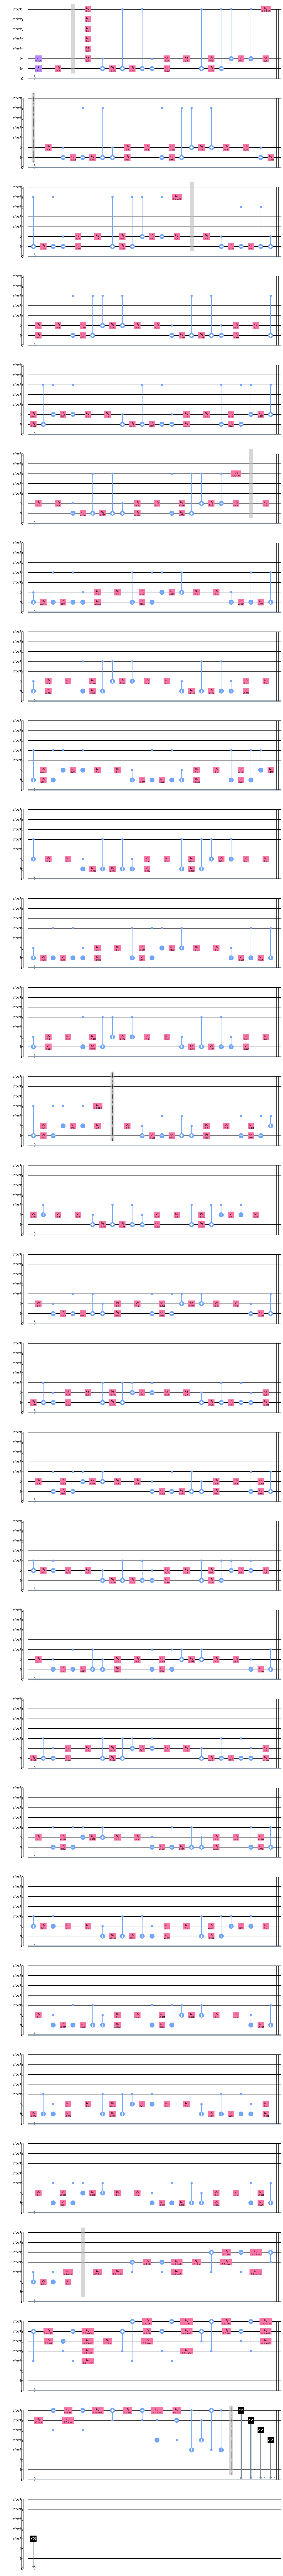

In [26]:
qc_basis = qc.decompose()
print("Depth original circuit:%d. Decomposed depth:%d"%(qc.depth(),qc_basis.depth()))
qc_basis.draw(output='mpl')


## Transpile

Remove the barriers and transpile

Transpiled depth:429


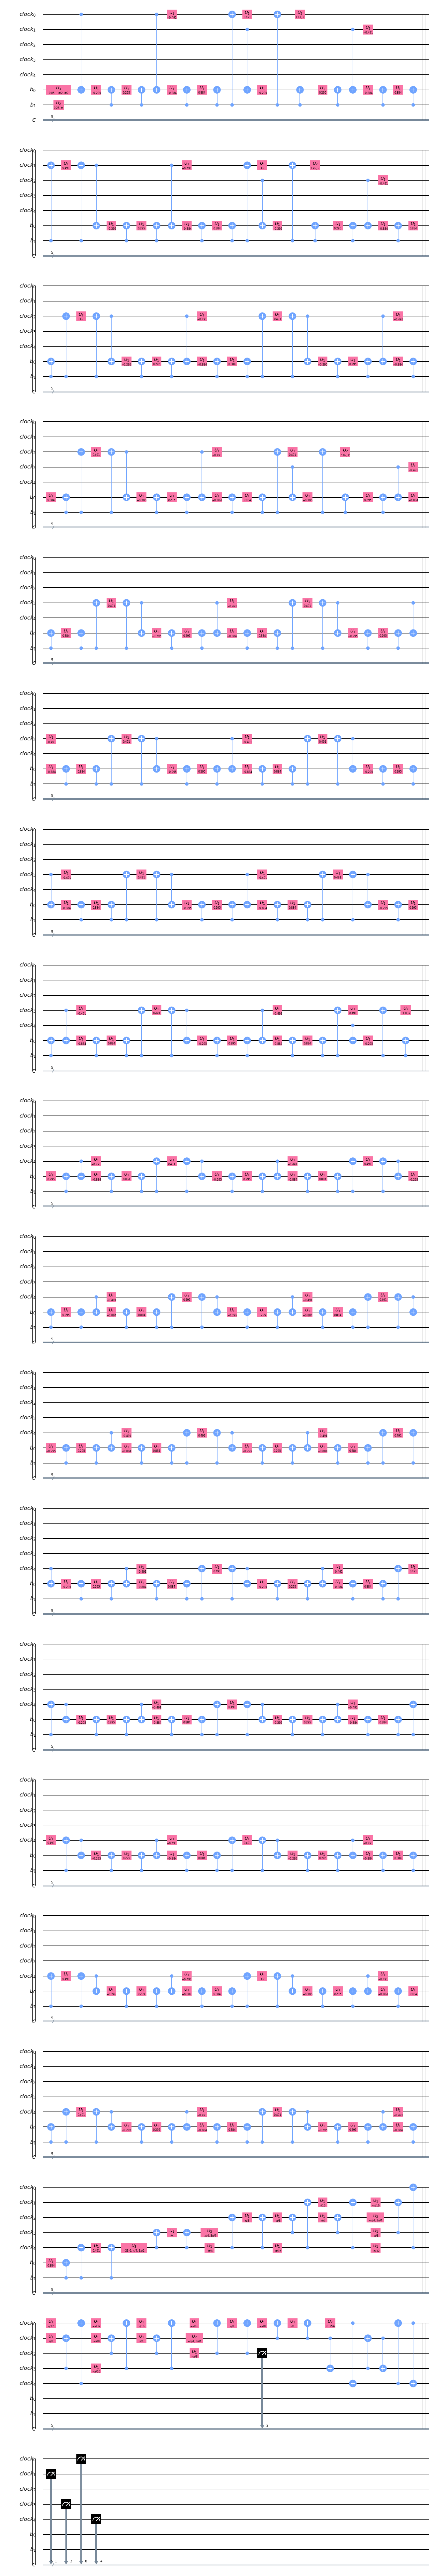

In [16]:
C=QuantumRegister(accuracy,name="clock")
b=QuantumRegister(Mqiskit.num_qubits,name="b")
sol=ClassicalRegister(accuracy,name="c")
qc=QuantumCircuit(C,b,sol,name="QPE")

InitState(qc,b,vector=6,barrier=False)

QPE(Mqiskit,qc,C,b,barrier=False)

qc.measure(C,sol)
qc_transpiled=transpile(qc,backend,optimization_level=1)
print("Transpiled depth:%d"%qc_transpiled.depth())
qc_transpiled.draw(output="mpl")


Qiskit Aqua includes a class to get the Eigenvalues directly, but needs to add the final swaps

In [17]:
from qiskit.aqua.components.eigs import EigsQPE
import inspect
inspect.signature(EigsQPE)

<Signature (operator, iqft, num_time_slices=1, num_ancillae=1, expansion_mode='trotter', expansion_order=1, evo_time=None, negative_evals=False, ne_qfts=None)>

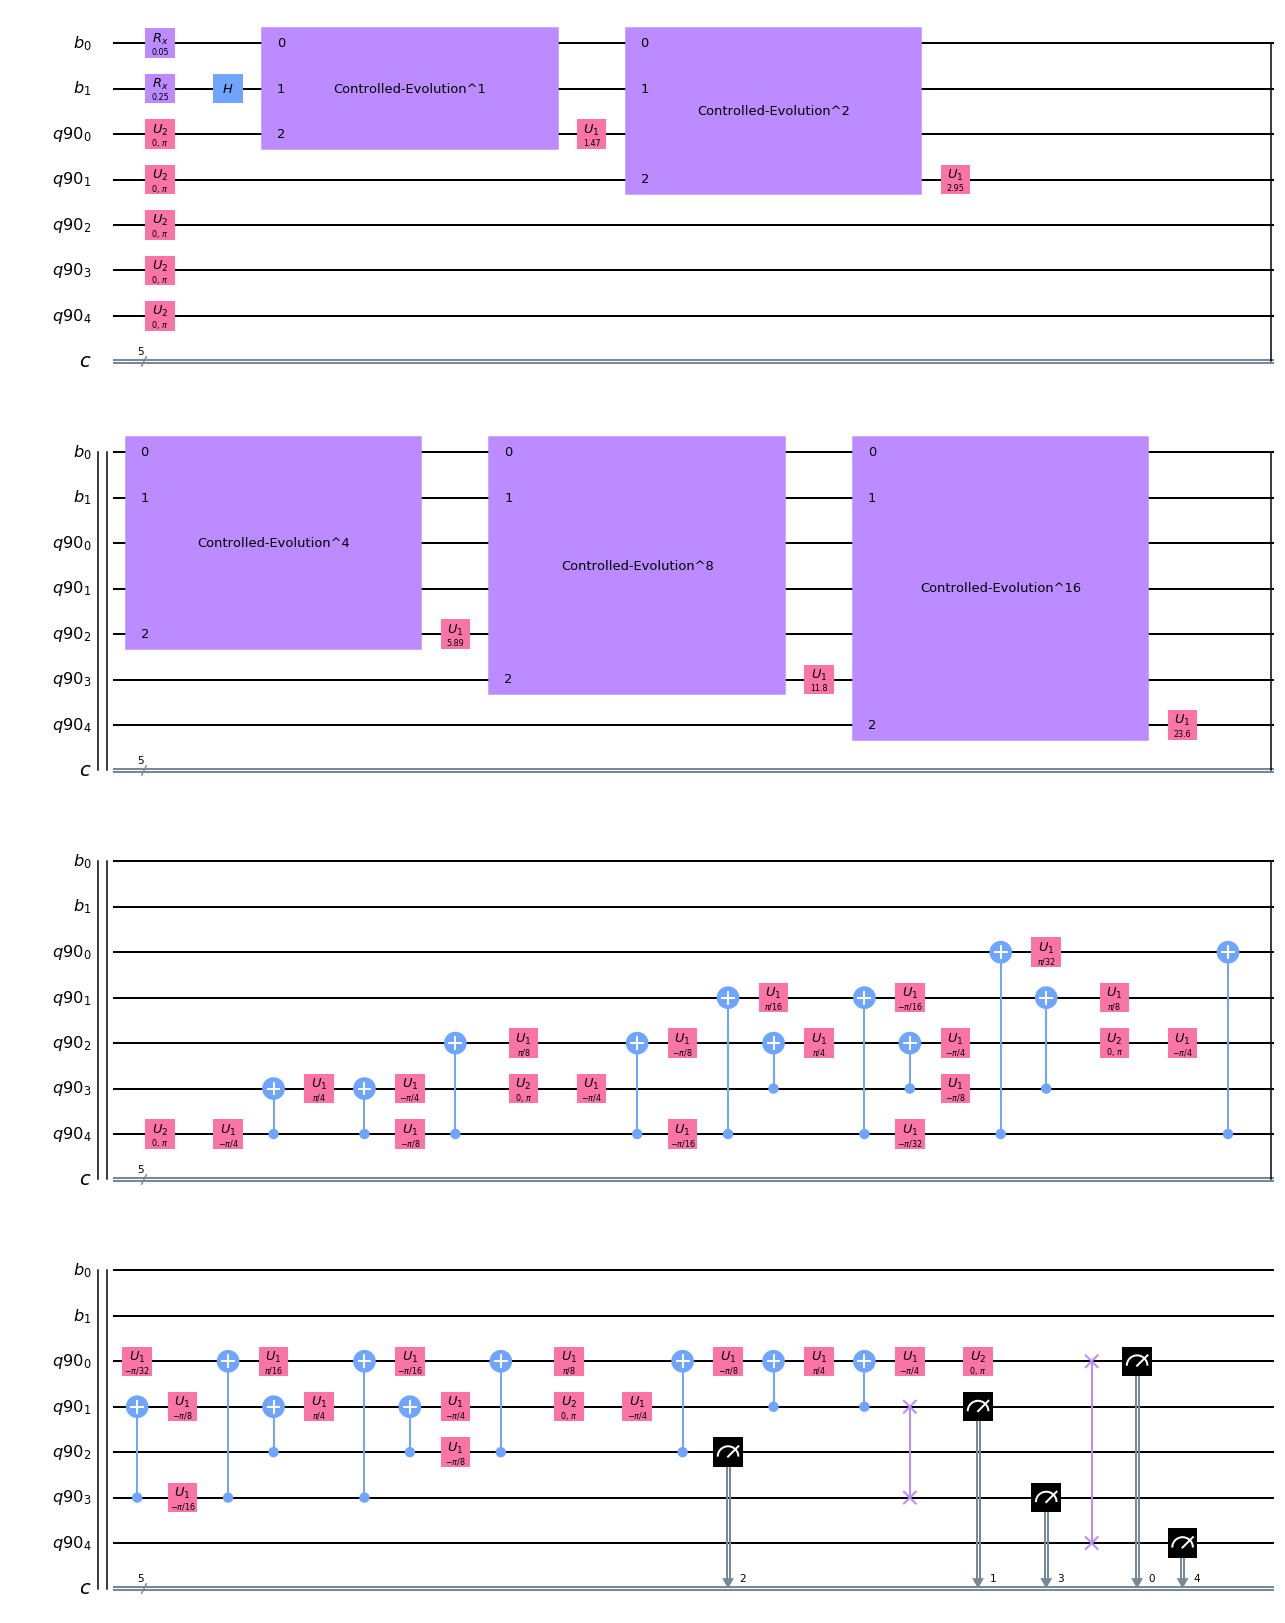

In [18]:
operator=MatrixOperator(M)
iqft = Standard(accuracy)
eigs=EigsQPE(operator,iqft,num_ancillae=accuracy,evo_time=2*np.pi/2**accuracy)

#C=QuantumRegister(accuracy,name="clock")
b=QuantumRegister(Mqiskit.num_qubits,name="b")
sol=ClassicalRegister(accuracy,name="c")
qc=QuantumCircuit(b,sol,name="QPE")

InitState(qc,b,vector=6,barrier=False)

qc+=eigs.construct_circuit(mode=None,register=b)

for i in range(accuracy//2):
    qc.swap(qc.qregs[1][i],qc.qregs[1][accuracy-i-1])

qc.measure(qc.qregs[1],sol)
qc.draw(output="mpl")

{'01000': 281, '10000': 226, '00100': 245, '00010': 248}


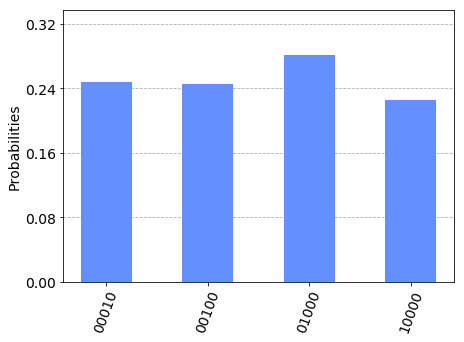

In [19]:
backend = BasicAer.get_backend("qasm_simulator")
quantum_instance = QuantumInstance(backend, shots=1000)
results=quantum_instance.execute(qc)
print(results.get_counts(qc))
plot_histogram(results.get_counts(qc),bar_labels=False)
